In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Stamps Example

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/History_of_United_States_postage_rates', header=0)[0]
df

,Date Introduced,Letters (for first ounce),Packages (for first ounce),Additional (per ounce),Postcard rate[2],Comments
0,"March 3, 1863",.06 (.03 for ​1⁄2 oz),.06,.06 (.03 per ​1⁄2 oz),0.06,.02 per half ounce in drop boxes[3][4]
1,"October 1, 1883",.04 (.02 for ​1⁄2 oz),.04,.04 (.02 per ​1⁄2 oz),0.04,[5]
2,"July 1, 1885",.02,.02,.02,0.02,[6]
3,"July 1, 1898",.02,.02,.02,0.01,[7]
4,"November 2, 1917",.03,.03,.03,0.02,War Years
5,"July 1, 1919",.02,.02,.02,0.01,Dropped back by Congress
6,"July 1, 1928",.02,.02,.02,0.01,NaN
7,"July 6, 1932",.03,.03,.03,0.01,NaN
8,"January 1, 1952",.03,.03,.03,0.02,NaN
9,"August 1, 1958",.04,.04,.04,0.03,NaN


#### Clean the DataFrame Up

In [3]:
#Keep Relevant Columns
df = df[['Date Introduced', 'Letters (for first ounce)']]
df.columns = ['Date', 'Price']
#Edit Price Column
df['Price'] = df['Price'].str.split(' ').str[0]
df['Price'] = df['Price'].str.split('[').str[0]
df['Price'] = df['Price'].astype('float')
#Edit Date Column
df['Date'] = df['Date'].str.split('[').str[0]
df['Date'] = pd.to_datetime(df['Date'])
#Preserve Only Dates After 1960
df = df[df['Date'].dt.year >= 1960].reset_index(drop=True)
df['Date'] = df['Date'].dt.year - 1960

/home/ahsan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/ahsan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ahsan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

#### Simple Example - First Four Data Points

First let's take the first four data points and plot a scatterplot between them.

Text(0.5, 0.92, 'Price of a Stamp Over Time')

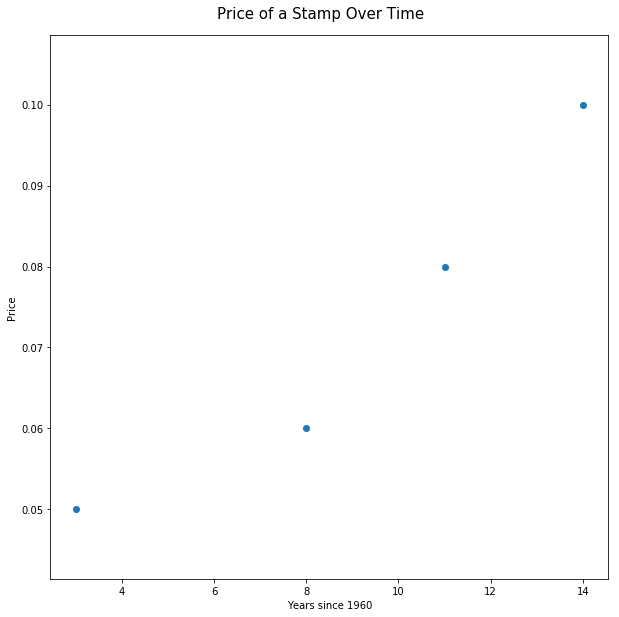

In [4]:
years = df['Date'][:4]
price = df['Price'][:4]
fig = plt.figure(figsize=(10,10))
plt.scatter(years, price)
plt.xlabel('Years since 1960')
plt.ylabel('Price')
fig.suptitle('Price of a Stamp Over Time', fontsize=15, y=0.92)

Now let's find the covariance and correlation of our two variables.

In [5]:
#Covariance
np.cov(years, price, bias=True)

array([[1.6500e+01, 7.5000e-02],
       [7.5000e-02, 3.6875e-04]])

In [6]:
#Covariance Divided by Variance = Correlation
np.cov(years, price, bias=True)[0][1] / (np.std(years) * np.std(price))

0.961508829696314

In [7]:
#Correlation & P-Value
stats.pearsonr(years, price)

(0.9615088296963142, 0.038491170303685776)

Now we can find the slope and intercept via least squares.

In [8]:
#Get Slope and Intercept
slope = np.cov(years, price, bias=True)[0][1] / np.var(years)
intercept = np.mean(price) - (slope * np.mean(years))

And our predicted values for the price of a stamp given our slope and intercept.

In [9]:
#Here are our predicted values based off of mx + b
(slope * years) + intercept

0    0.045227
1    0.067955
2    0.081591
3    0.095227
Name: Date, dtype: float64

In [10]:
predictions = (slope * years) + intercept

Now we can plot our predicted values relative to the observed values.

One thing to note - we can plot scatterplots of the raw data, but any line plots (regression or else) must be in order for them to be plotted properly. We can use 'argsort' to capture the sorting argument for the predictor variable, and then use that as the order we'll plot the predictor and dependent variable in.

Text(0.5, 0.92, 'Price of a Stamp Over Time')

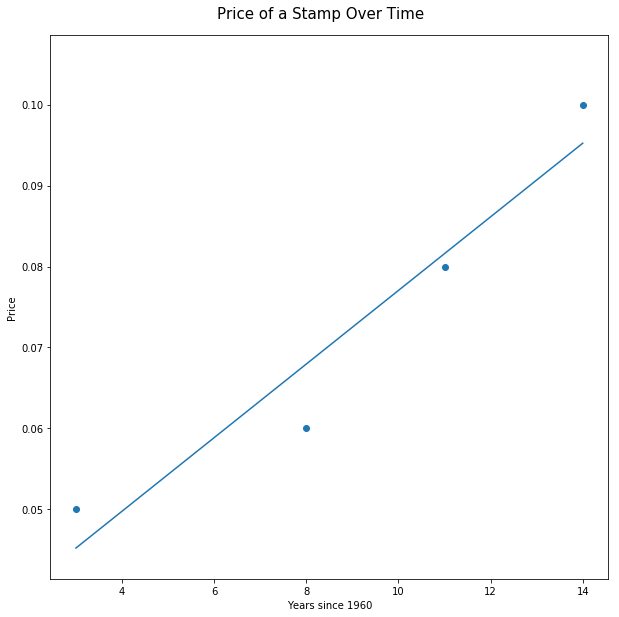

In [11]:
fig = plt.figure(figsize=(10,10))
plt.scatter(years, price)
sorted_order = np.argsort(years)
plt.plot(years[sorted_order], predictions[sorted_order])
plt.xlabel('Years since 1960')
plt.ylabel('Price')
fig.suptitle('Price of a Stamp Over Time', fontsize=15, y=0.92)

And we can find and calculate residuals.

In [12]:
#Below are the Residuals for Our Predictions
price - predictions

0    0.004773
1   -0.007955
2   -0.001591
3    0.004773
dtype: float64

In [13]:
residuals = price - predictions

There aren't many data points, but the residuals look randomly distributed around 0. Residuals are assumed to have a **normal distribution** with a mean of 0.

Text(0.5, 0.92, 'Residuals')

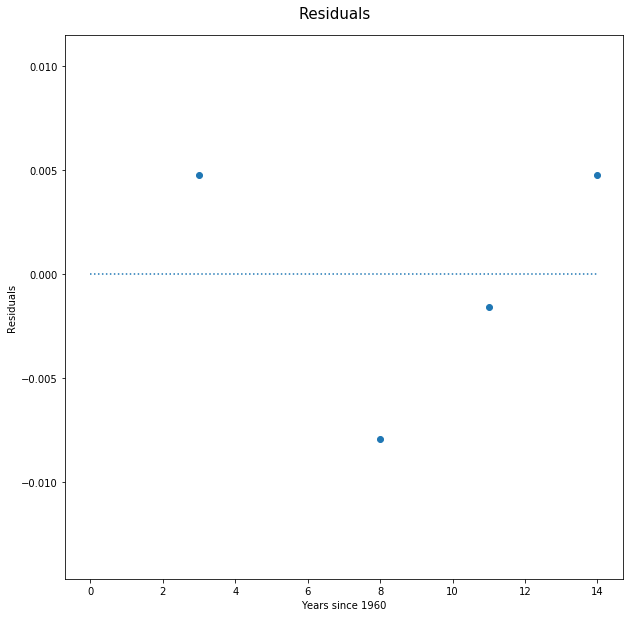

In [14]:
fig = plt.figure(figsize=(10,10))
plt.scatter(years, residuals)
plt.plot([0, years.max()], [0,0], linestyle='dotted')
plt.xlabel('Years since 1960')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

We can find the R-squared value of our least squares fit, either by finding 1 - the value of our residuals or simply squaring the correlation value.

In [15]:
#Manually Calculate R^2 Value
np.var(predictions) / np.var(price)

0.9244992295839759

In [16]:
#Same as
1 - (np.var(residuals) / np.var(price))

0.9244992295839752

In [17]:
#Also the Squared Value of the Correlation Coefficient
np.power(stats.pearsonr(years, price)[0], 2)

0.9244992295839758

Let's make a **function** so that finding these values will be easier going forward.

In [18]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

Now we can repeat the above steps for the entire dataframe rather than the first four values.

In [19]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(df['Date'], df['Price'])

Text(0.5, 0.92, 'Price of a Stamp Over Time')

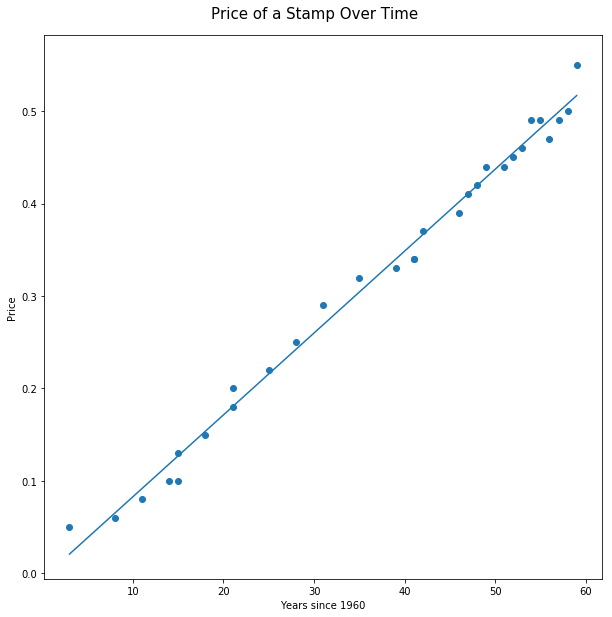

In [20]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['Date'], df['Price'])
sorted_order = np.argsort(df['Date'])
plt.plot(df['Date'][sorted_order], predictions[sorted_order])
plt.xlabel('Years since 1960')
plt.ylabel('Price')
fig.suptitle('Price of a Stamp Over Time', fontsize=15, y=0.92)

Text(0.5, 0.92, 'Residuals')

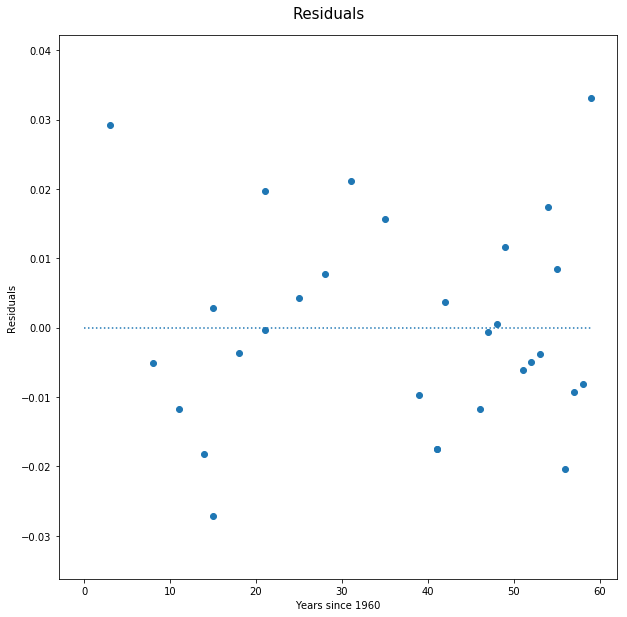

In [21]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['Date'], residuals)
plt.plot([0, df['Date'][len(df) - 1]], [0,0], linestyle='dotted')
plt.xlabel('Years since 1960')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

In [22]:
#Manually Calculate R^2 Value
np.var(predictions) / np.var(df['Price'])

0.990849317817111

The residuals look heteroskedastic and the R-squared value is 99%. Safe to say that there is a strong linear relationship between the two variables!

We can also see the **confidence interval** and **prediction intervals** of our slope to get a sense of where the mean Y value should be for a given X value as where as where a *new* Y value could be for a given X value.

In [23]:
def get_intervals(a, b, residuals):
    t = stats.t(df=len(a) - 2).ppf(0.975)
    s_err = np.sum(np.power(residuals, 2))
    confidence_interval = t * np.sqrt((s_err/(len(a) - 2))*(1/len(a) + (np.power((a - a.mean()), 2)/((np.sum(np.power(a,2))) - len(df)*(np.power(a.mean(),2))))))
    prediction_interval = t * (np.std(residuals))
    return abs(confidence_interval), prediction_interval

In [24]:
ci, pi = get_intervals(df['Date'], df['Price'], residuals)

Text(0.5, 0.92, 'Price of a Stamp Over Time')

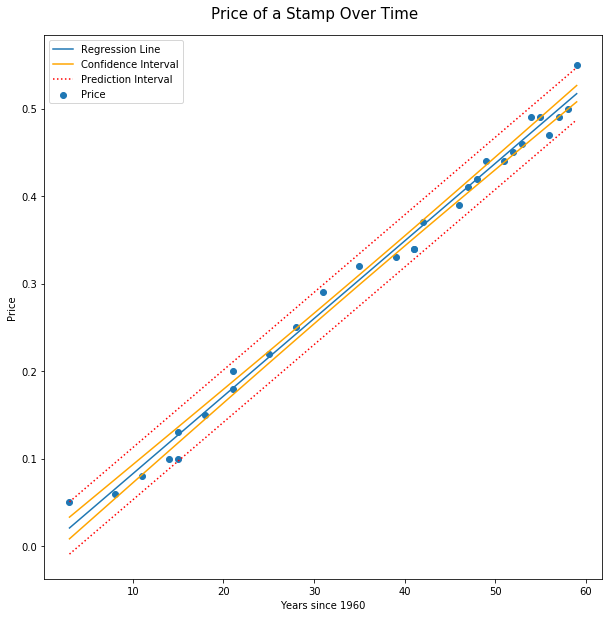

In [25]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['Date'], df['Price'])
sorted_order = np.argsort(df['Date'])
plt.plot(df['Date'][sorted_order], predictions[sorted_order], label='Regression Line')
plt.plot(df['Date'][sorted_order], (predictions + ci)[sorted_order], color='orange', label='Confidence Interval')
plt.plot(df['Date'][sorted_order], (predictions - ci)[sorted_order], color='orange', label='_Confidence Interval')
plt.plot(df['Date'][sorted_order], (predictions + pi)[sorted_order], color='red', label='Prediction Interval', linestyle='dotted')
plt.plot(df['Date'][sorted_order], (predictions - pi)[sorted_order], color='red', label='_Prediction Interval', linestyle='dotted')
plt.xlabel('Years since 1960')
plt.ylabel('Price')
plt.legend()
fig.suptitle('Price of a Stamp Over Time', fontsize=15, y=0.92)

The graph should help you understand the purpose of confidence and prediction intervlas - the orange lines are the 95% confidence interval of where the *mean* Y value for a given X value will lay, and the red lines are the 95% confidence interval of where a *new* Y value for a given X value could land. Note that nearly all of the observed points are between the red lines - as 95% of them should be.

Let's now run this function for the shortened graph to show the difference in the intervals.

In [26]:
slope_short, intercept_short, predictions_short, residuals_short = evaluate_linear_relationship(df['Date'][:4], df['Price'][:4])

In [27]:
ci_short, pi_short = get_intervals(df['Date'][:4], df['Price'][:4], residuals_short)

Text(0.5, 0.92, 'Price of a Stamp Over Time')

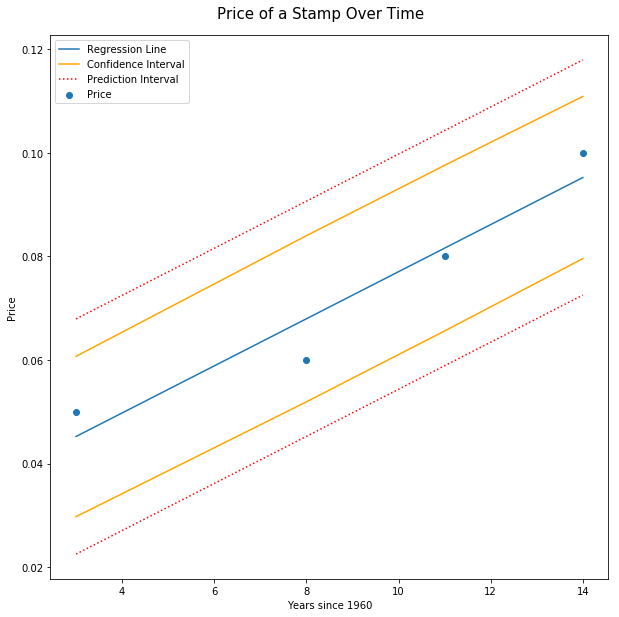

In [28]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['Date'][:4], df['Price'][:4])
sorted_order = np.argsort(df['Date'][:4])
plt.plot(df['Date'][:4][sorted_order], (predictions_short)[sorted_order], label='Regression Line')
plt.plot(df['Date'][:4][sorted_order], (predictions_short + ci_short)[sorted_order], color='orange', label='Confidence Interval')
plt.plot(df['Date'][:4][sorted_order], (predictions_short - ci_short)[sorted_order], color='orange', label='_Confidence Interval')
plt.plot(df['Date'][:4][sorted_order], (predictions_short + pi_short)[sorted_order], color='red', linestyle='dotted', label='Prediction Interval')
plt.plot(df['Date'][:4][sorted_order], (predictions_short - pi_short)[sorted_order], color='red', linestyle='dotted', label='_Prediction Interval')
plt.xlabel('Years since 1960')
plt.ylabel('Price')
plt.legend()
fig.suptitle('Price of a Stamp Over Time', fontsize=15, y=0.92)

Note that the mean confidence intervals are much closer to the prediction intervals than they were in the original graph. This makes sense given that are we are taking less data points here - similar to the Central Limit Theorem where the standard deviation has a direct inverse relationship to the number of points sampled.

In [29]:
pi

0.02983812586387907

In [30]:
pi_short

0.02270272567231785

While the gap looks much larger here because of the difference in scale, the prediction intervals are actually similar sizes.

In [31]:
ci.mean()

0.007806122524847277

In [32]:
ci_short.mean()

0.015789705513401253

While the confidence interval of the shortened dataset is nearly twice as large as the confidence interval of the larger dataset.

### Apple Stock Prices Example

In [33]:
#Read in Apple Dataset
prices = pd.read_csv('AAPL.csv')
prices['Date'] = pd.to_datetime(prices['Date'])
prices['Date'] = prices['Date'].dt.year
year_prices = prices.groupby('Date')['Close'].mean().reset_index()
year_prices = year_prices[year_prices['Date'] >= 1995].reset_index(drop=True)
year_prices['Date'] = year_prices['Date'] - 1995
year_prices.head()

,Date,Close
0,0,1.407552
1,1,0.856027
2,2,0.618583
3,3,1.089472
4,4,2.123140


Text(0, 0.5, 'Average Annual Stock Price')

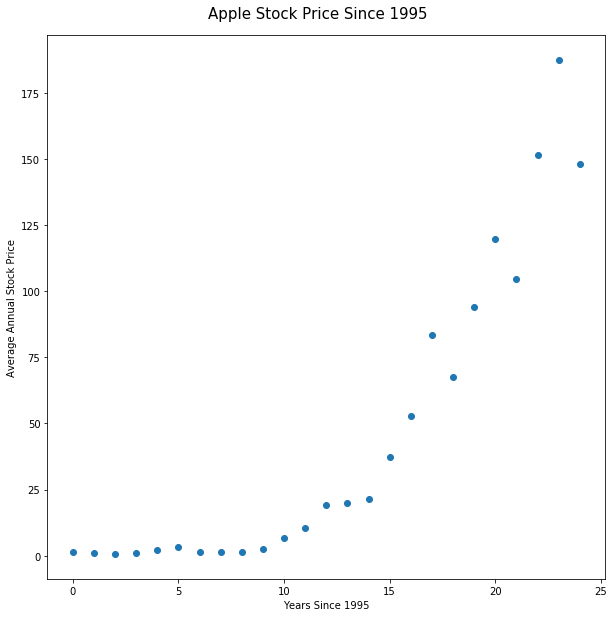

In [34]:
fig = plt.figure(figsize=(10,10))
plt.scatter(year_prices['Date'], year_prices['Close'])
fig.suptitle('Apple Stock Price Since 1995', fontsize=15, y=0.92)
plt.xlabel('Years Since 1995')
plt.ylabel('Average Annual Stock Price')

Above we see that the relationship between years and Apple stock price is non-linear.

In [35]:
slope_apple, intercept_apple, predictions_apple, residuals_apple = evaluate_linear_relationship(year_prices['Date'], year_prices['Close'])

Text(0, 0.5, 'Average Annual Stock Price')

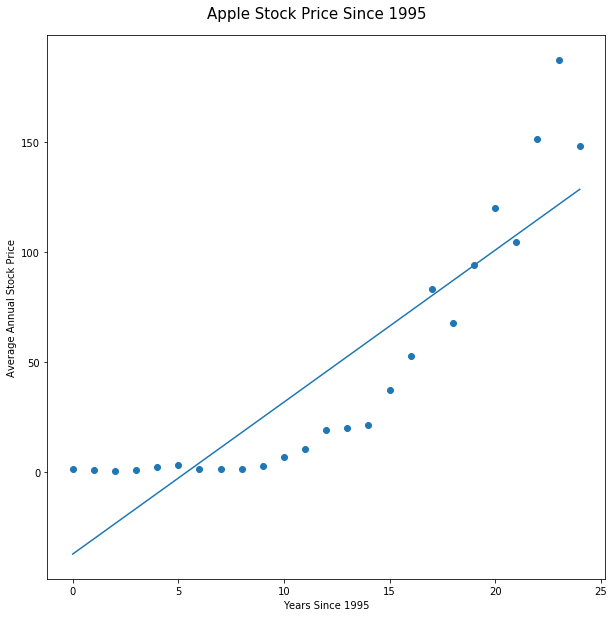

In [36]:
fig = plt.figure(figsize=(10,10))
plt.scatter(year_prices['Date'], year_prices['Close'])
sorted_order = np.argsort(year_prices['Date'])
plt.plot(year_prices['Date'][sorted_order], predictions_apple[sorted_order])
fig.suptitle('Apple Stock Price Since 1995', fontsize=15, y=0.92)
plt.xlabel('Years Since 1995')
plt.ylabel('Average Annual Stock Price')

Text(0.5, 0.92, 'Residuals')

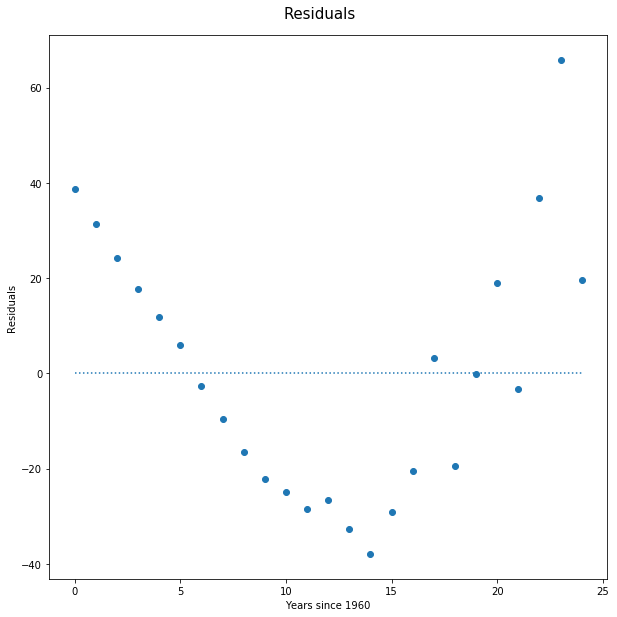

In [37]:
fig = plt.figure(figsize=(10,10))
plt.scatter(year_prices['Date'], residuals_apple)
plt.plot([0, year_prices['Date'][len(year_prices) - 1]], [0,0], linestyle='dotted')
plt.xlabel('Years since 1960')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

The residuals graph is also pretty clearly non-random...

In [38]:
np.var(predictions) / np.var(year_prices['Close'])

7.240236728786881e-06

Even though the data has an R^2 value of over 78%

In [39]:
ci_apple, pi_apple = get_intervals(year_prices['Date'], year_prices['Close'], residuals_apple)

Text(0.5, 0.92, 'Apple Stock Price Since 1995')

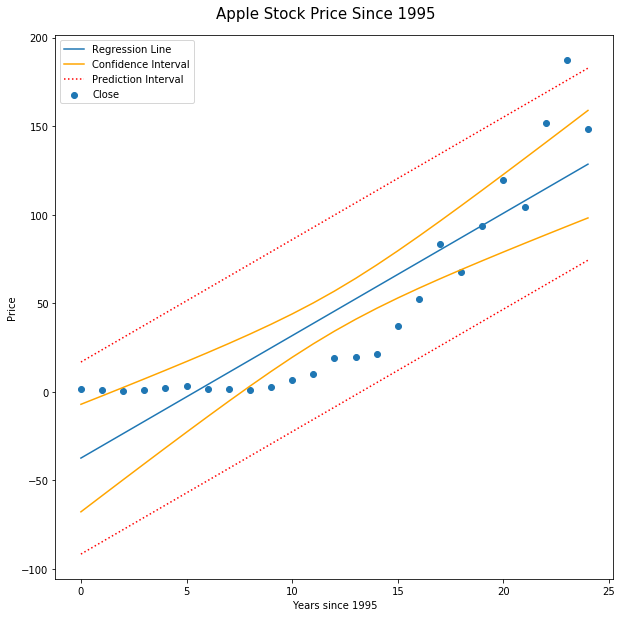

In [40]:
fig = plt.figure(figsize=(10,10))
plt.scatter(year_prices['Date'], year_prices['Close'])
sorted_order = np.argsort(year_prices['Date'])
plt.plot(year_prices['Date'][sorted_order], (predictions_apple)[sorted_order], label='Regression Line')
plt.plot(year_prices['Date'][sorted_order], (predictions_apple + ci_apple)[sorted_order], color='orange', label='Confidence Interval')
plt.plot(year_prices['Date'][sorted_order], (predictions_apple - ci_apple)[sorted_order], color='orange', label='_Confidence Interval')
plt.plot(year_prices['Date'][sorted_order], (predictions_apple + pi_apple)[sorted_order], color='red', linestyle='dotted', label='Prediction Interval')
plt.plot(year_prices['Date'][sorted_order], (predictions_apple - pi_apple)[sorted_order], color='red', linestyle='dotted', label='_Prediction Interval')
plt.xlabel('Years since 1995')
plt.ylabel('Price')
plt.legend()
fig.suptitle('Apple Stock Price Since 1995', fontsize=15, y=0.92)

Note that several of the values fall outside of the mean confidence interval points for a given X value, rendering again that a linear model is unreliable for this type of data.

Let's now look at the relationship between years and the log of annual prices.

Text(0, 0.5, 'Average Annual Stock Price')

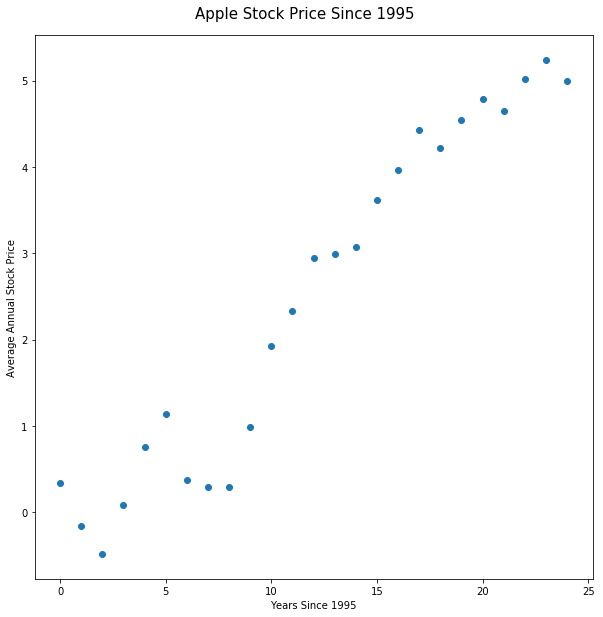

In [41]:
fig = plt.figure(figsize=(10,10))
plt.scatter(year_prices['Date'], np.log(year_prices['Close']))
fig.suptitle('Apple Stock Price Since 1995', fontsize=15, y=0.92)
plt.xlabel('Years Since 1995')
plt.ylabel('Average Annual Stock Price')

In [42]:
slope_apple, intercept_apple, predictions_apple, residuals_apple = evaluate_linear_relationship(year_prices['Date'], np.log(year_prices['Close']))

Text(0, 0.5, 'Average Annual Stock Price')

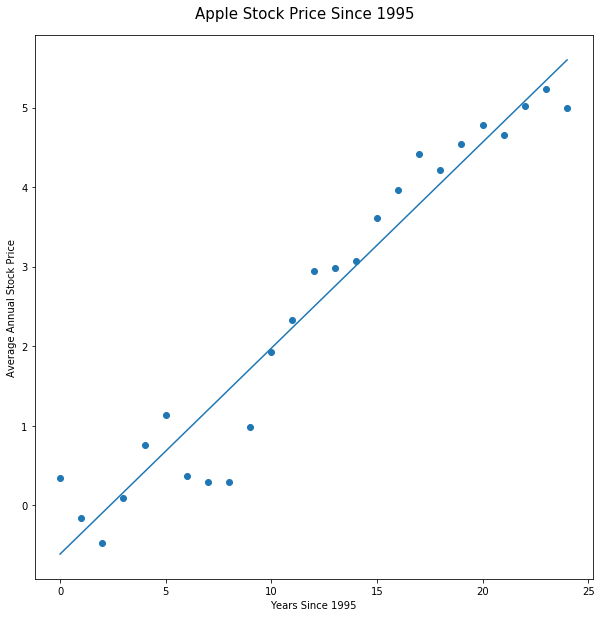

In [43]:
fig = plt.figure(figsize=(10,10))
plt.scatter(year_prices['Date'], np.log(year_prices['Close']))
sorted_order = np.argsort(year_prices['Date'])
plt.plot(year_prices['Date'][sorted_order], predictions_apple[sorted_order])
fig.suptitle('Apple Stock Price Since 1995', fontsize=15, y=0.92)
plt.xlabel('Years Since 1995')
plt.ylabel('Average Annual Stock Price')

Text(0.5, 0.92, 'Residuals')

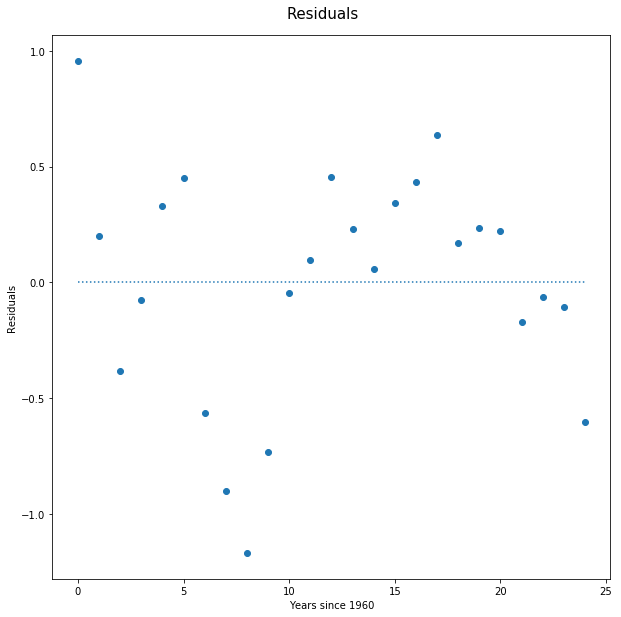

In [44]:
fig = plt.figure(figsize=(10,10))
plt.scatter(year_prices['Date'], residuals_apple)
plt.plot([0, year_prices['Date'][len(year_prices) - 1]], [0,0], linestyle='dotted')
plt.xlabel('Years since 1960')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

In [45]:
np.var(predictions) / np.var(np.log(year_prices['Close']))

0.006167157374226682

The residuals look heteroskedastic and the R-squared value is 93%. Again we can observe there is a strong linear relationship between the two variables.

We can also see the confidence interval and prediction intervals of our slope to get a sense of where the mean Y value should be for a given X value as where as where a new Y value could be for a given X value.

In [46]:
ci_apple, pi_apple = get_intervals(year_prices['Date'], np.log(year_prices['Close']), residuals_apple)

Text(0.5, 0.92, 'Apple Stock Price Since 1995')

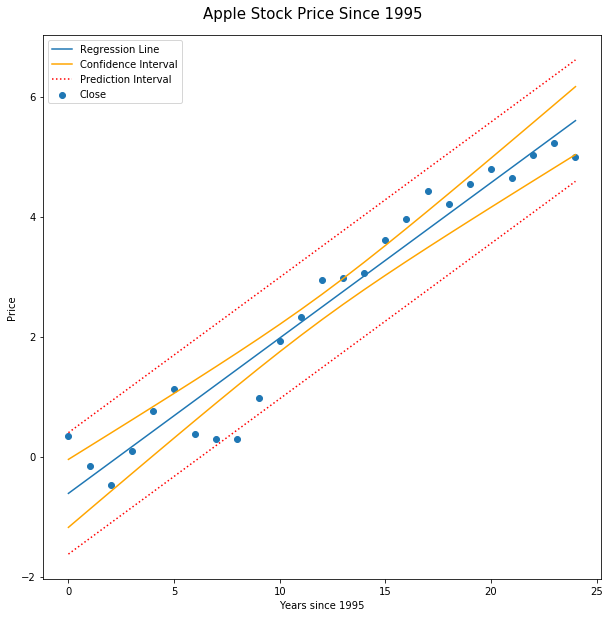

In [47]:
fig = plt.figure(figsize=(10,10))
plt.scatter(year_prices['Date'], np.log(year_prices['Close']))
sorted_order = np.argsort(year_prices['Date'])
plt.plot(year_prices['Date'][sorted_order], predictions_apple[sorted_order], label='Regression Line')
plt.plot(year_prices['Date'][sorted_order], (predictions_apple + ci_apple)[sorted_order], color='orange', label='Confidence Interval')
plt.plot(year_prices['Date'][sorted_order], (predictions_apple - ci_apple)[sorted_order], color='orange', label='_Confidence Interval')
plt.plot(year_prices['Date'][sorted_order], (predictions_apple + pi_apple)[sorted_order], color='red', linestyle='dotted', label='Prediction Interval')
plt.plot(year_prices['Date'][sorted_order], (predictions_apple - pi_apple)[sorted_order], color='red', linestyle='dotted', label='_Prediction Interval')
plt.xlabel('Years since 1995')
plt.ylabel('Price')
plt.legend()
fig.suptitle('Apple Stock Price Since 1995', fontsize=15, y=0.92)